<a href="https://colab.research.google.com/github/Tran-Thu-Le/share/blob/main/Time_Series/bitcoin_log_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [87]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/Tran-Thu-Le/share/main/Time_Series/coins/coin_Bitcoin.csv')

In [83]:
data.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [84]:
# data = pd.read_csv("coin_Bitcoin.csv")

# We remove both the name and the symbol variable, as these are identical across all data points. 
# We will also drop the SNo variable as this keeps track of how many datapoints there are, but this is also done by the rows in excel
# We will drop rows in which a volume of 0 was recorded for reasons explained above
data = data.drop("Name", axis=1)
data = data.drop("Symbol", axis=1)
data = data.drop("SNo", axis=1)
no_volume = data[data["Volume"] == 0].index
data = data.drop(no_volume, axis=0)

print("The dataset contains {} datapoints".format(len(data['Close'])))
for key in data.keys():
    print(" {0} : {1} missing value(s)".format(key, data[key].isna().sum()))   
print("{} rows were dropped because there was a value of 0 for volume".format(len(no_volume)))     

The dataset contains 2749 datapoints
 Date : 0 missing value(s)
 High : 0 missing value(s)
 Low : 0 missing value(s)
 Open : 0 missing value(s)
 Close : 0 missing value(s)
 Volume : 0 missing value(s)
 Marketcap : 0 missing value(s)
242 rows were dropped because there was a value of 0 for volume


In [ ]:
if ( np.array(no_volume) == np.arange(0, 242) ).all():
    print("REPORT: 242 rows (ranging 0 to 241) in the original dataset are the 'missing'")

In [43]:
print(data.loc[241])

SNo                          242
Name                     Bitcoin
Symbol                       BTC
Date         2013-12-26 23:59:59
High                      777.75
Low                       683.94
Open                      683.94
Close                     761.98
Volume                         0
Marketcap            9.27974e+09
Name: 241, dtype: object


In [42]:
print(data.loc[242])

SNo                          243
Name                     Bitcoin
Symbol                       BTC
Date         2013-12-27 23:59:59
High                      777.51
Low                        713.6
Open                      763.28
Close                     735.07
Volume               4.68627e+07
Marketcap            8.95539e+09
Name: 242, dtype: object


In [88]:
data.shape

(2991, 10)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning:

divide by zero encountered in log



198


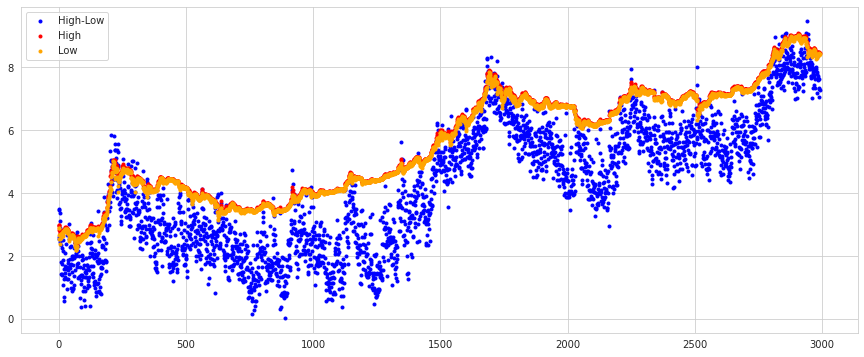

In [100]:
plt.figure(figsize=(15, 6))
m, n = data.shape
# plt.scatter(np.arange(m), data["Close"]-data["Open"], label="Close- Open", color="orange", marker=".")
# plt.plot(data["Open"]*1.1, label="Open")
# plt.plot(data["Low"], label="Low")
diff = np.log(data["High"]-data["Low"])
plt.scatter(np.arange(m), diff, label="High-Low", color="blue", marker=".")
plt.scatter(np.arange(m), np.log(data["High"])-2., label="High", color="red", marker=".")
plt.scatter(np.arange(m), np.log(data["Low"])*, label="Low", color="orange", marker=".")
plt.legend()


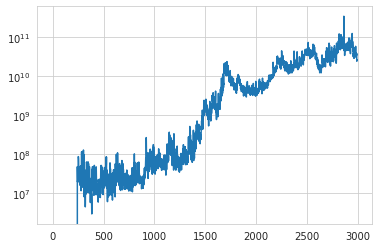

In [102]:
plt.plot(data["Volume"])
plt.yscale("log")

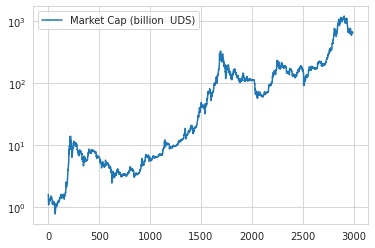

In [107]:
plt.plot(data["Marketcap"]/1e9, label="Market Cap (billion  UDS)")
plt.yscale("log")
plt.legend()

In [120]:
def get_peaks(data):
    rag1 = np.arange(0, 500)
    rag2 = np.arange(1500, 2000)
    id1 = np.log(data["Close"][rag1]).argmax()
    id2 = np.log(data["Close"][rag2]).argmax()
    val1 = np.log(data["Close"][rag1]).max()
    val2 = np.log(data["Close"][rag2]).max()
    index1 = rag1[id1]
    index2 = rag2[id2]
    return index1, index2, val1, val2

index1, index2, val1, val2 = get_peaks(data)


219 1692 7.048534133644348 9.878036422363548


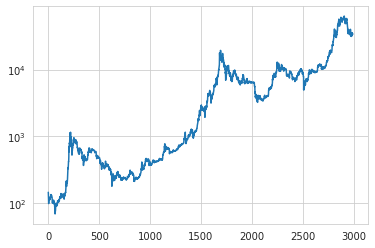

In [129]:
plt.plot(data["Close"])
plt.yscale("log")
print(index1, index2, val1, val2 )

In [127]:
4*30*3

360

In [118]:
np.exp(np.log(100))

100.00000000000004